# Problem 1

## ODE Equations

$$
\begin{aligned}
&\frac{d x_{1}}{d t}=v_{1} \\
&\frac{d x_{2}}{d t}=v_{2} \\
&\frac{d v_{1}}{d t}=u_{1} \\
&\frac{d v_{2}}{d t}=u_{2}
\end{aligned}
$$

## Collocation Equations

$$
\begin{aligned}
&1.5\left[\begin{array}{cc}
.75 & -.25 \\
1 & 0
\end{array}\right]\left[\begin{array}{l}
\frac{d x_{1}}{d t} \\
\frac{d x_{2}}{d t}
\end{array}\right]=\left[\begin{array}{l}
x_{1}-0 \\
x_{2}-0
\end{array}\right] \\
&1.5\left[\begin{array}{cc}
.75 & -.25 \\
1 & 0
\end{array}\right]\left[\begin{array}{l}
\frac{d v_{1}}{x_{t}} \\
\frac{d v_{2}}{d t}
\end{array}\right]=\left[\begin{array}{l}
v_{1}-1 \\
v_{2}-1
\end{array}\right]
\end{aligned}
$$

## KKT Conditions
$$
\begin{aligned}
&J=v_{2}^{2} \\
&\frac{\partial J}{\partial x}=2 v_{2}=0 \text { for optimum. } \\
&\Rightarrow v_{2}=0
\end{aligned}
$$

In [8]:
import numpy as np
N = 1.5 * np.array([[.75,-.25],[1,0]])

time = np.array([0.0, 0.75,1.5])

from scipy.optimize import fsolve

# multi start guess
for i in range(5):
    zGuess = np.random.uniform(-5,5,9) # initial guess at solution

    def myFunction(z):
        #unpack everything
        u1 = z[0]
        u2 = z[1]
        x1 = z[2]
        x2 = 1.0
        v1 = z[3]
        v2 = z[4]
        dx1 = z[5]
        dx2 = z[6]
        dv1 = z[7]
        dv2 = z[8]

        #useful forms
        x = np.array([x1,x2])
        v = np.array([v1,v2])
        dx = np.array([dx1,dx2])
        dv = np.array([dv1,dv2])

        F = np.empty(9)

        #ode equations, solved for 0
        F[0] = dx1 - v1
        F[1] = dx2 - v2
        F[2] = dv1 - u1
        F[3] = dv2 - u2

        #collocation equations
        F[4:6] = N @ dx - (x - np.zeros(2))
        F[6:8] = N @ dv - (v - np.ones(2))

        #kkt condition
        F[-1] = v2
        return F

    z = fsolve(myFunction,zGuess)
    z = np.round(z, 5)
    if np.isclose(z[4], 0):
        print('\nVALID SOLUTION')
        print('u1:',z[0])
        print('u2:',z[1])
        print('x1:',z[2])
        print('v1:',z[3])
        print('v2:',z[4])
        print('dx1:',z[5])
        print('dx2:',z[6])
        print('dv1:',z[7])
        print('dv2:',z[8])
    else:
        print("\nKKT Condition Not Met")



VALID SOLUTION
u1: -0.66667
u2: -1.11111
x1: 0.75
v1: 0.66667
v2: 0.0
dx1: 0.66667
dx2: -0.0
dv1: -0.66667
dv2: -1.11111

VALID SOLUTION
u1: -0.66667
u2: -1.11111
x1: 0.75
v1: 0.66667
v2: 0.0
dx1: 0.66667
dx2: -0.0
dv1: -0.66667
dv2: -1.11111

VALID SOLUTION
u1: -0.66667
u2: -1.11111
x1: 0.75
v1: 0.66667
v2: -0.0
dx1: 0.66667
dx2: -0.0
dv1: -0.66667
dv2: -1.11111

VALID SOLUTION
u1: -0.66667
u2: -1.11111
x1: 0.75
v1: 0.66667
v2: -0.0
dx1: 0.66667
dx2: -0.0
dv1: -0.66667
dv2: -1.11111

VALID SOLUTION
u1: -0.66667
u2: -1.11111
x1: 0.75
v1: 0.66667
v2: -0.0
dx1: 0.66667
dx2: -0.0
dv1: -0.66667
dv2: -1.11111


# Problem 2

# Problem 3

$$
\begin{aligned}
&\max _{u_{1}, u_{2}} x_{4}\left(t_{f}\right) x_{1}\left(t_{f}\right)\\
\text { s.t. } \\
&\frac{d x_{1}}{d t}=u_{1}+u_{2}\\
&w_{1}=14.35+x_{3}+\frac{x_{3}^{2}}{111.5}\\
&x_{1} \frac{d x_{2}}{d t}=g_{1} x_{1} x_{2}-\left(u_{1}+u_{2}\right) x_{2}\\
&w_{2}=0.22+x_{5}\\
&x_{1} \frac{d x_{3}}{d t}=u_{1} c_{1}-\left(u_{1}+u_{2}\right) x_{3}-\frac{g_{1} x_{1} x_{2}}{c_{2}} \\
&w_{3}=\frac{0.22 x_{7}}{w_{2}}+x_{6}\\
&x_{1} \frac{d x_{4}}{d t}=g_{2} x_{1} x_{2}-\left(u_{1}+u_{2}\right) x_{4}\\
&g_{1}=\frac{x_{3} w_{3}}{w_{1}}\\
&x_{1} \frac{d x_{5}}{d t}=u_{2} c_{3}-\left(u_{1}+u_{2}\right) x_{5}\\
&g_{2}=0.233 \frac{x_{3}}{w_{1}} \frac{\left(0.0005+x_{5}\right)}{\left(0.022+x_{5}\right)}\\
&\frac{d x_{6}}{d t}=-g_{3} x_{6}\\
&d x_{7}=-g_{3} x_{6}=g_{3}=0.09 \frac{x_{5}}{0.034+x_{5}}\\
&\frac{d x_{7}}{d t}=g_{3}\left(1-x_{7}\right) \\
&0 \leq u_{1}, u_{2} \leq 1\\
&c_{1}=100, c_{2}=0.51, c_{3}=4 \\
&0 \leq x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7} \leq 100
\end{aligned}
$$


Number nodes: 6
Number time points: 11
Total Product: 2.5132205881

Number nodes: 6
Number time points: 51
Total Product: 3.5149002506

Number nodes: 6
Number time points: 101
Total Product: 4.2240231377

Number nodes: 6
Number time points: 301
Total Product: 5.2237991895

Number nodes: 6
Number time points: 501
Total Product: 5.4455356033


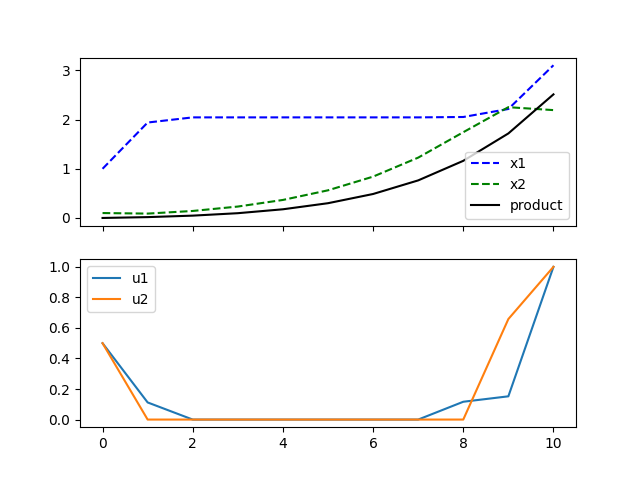

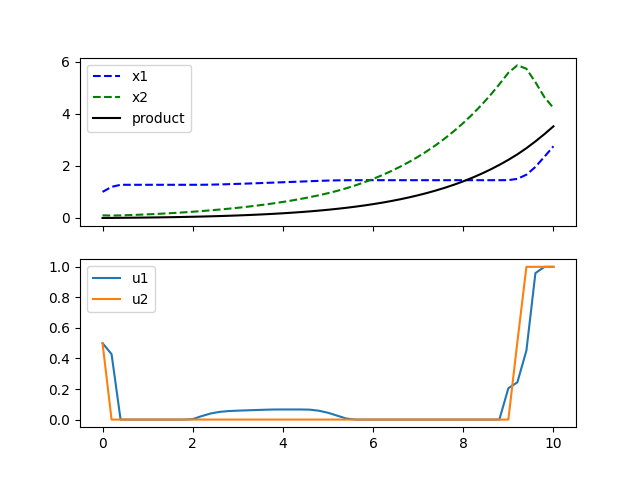

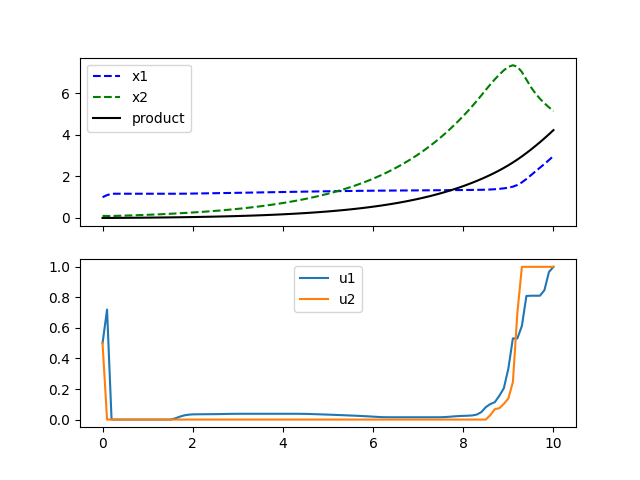

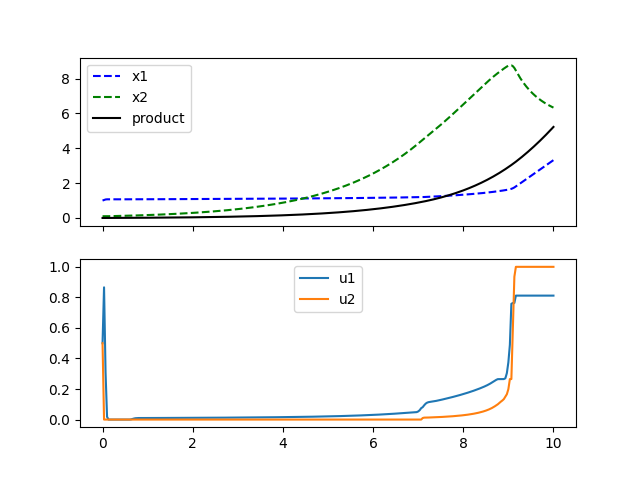

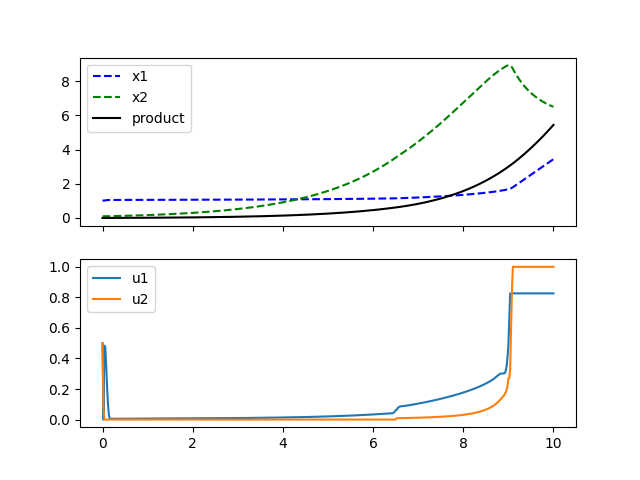

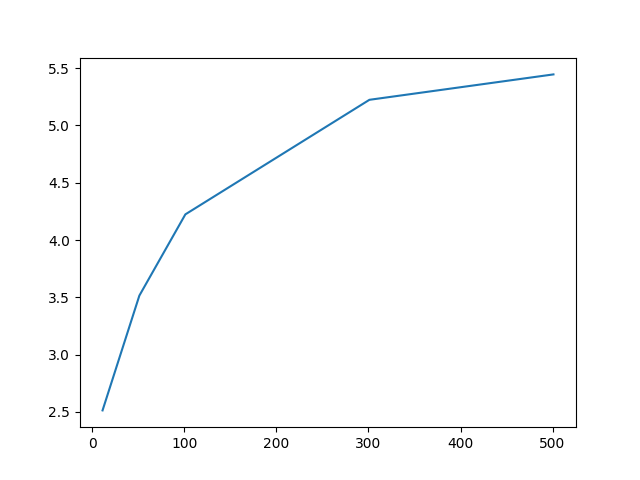

In [43]:
from gekko import GEKKO
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

N = [11,51,101, 301, 501]
product_hist = []
for i,n in enumerate(N):

    m = GEKKO()

    tf = 10
    m.time = np.linspace(0,tf,n)

    #dynamic variables and their ICs and bounds
    x1 = m.Var(1,lb=0, ub=100)
    x2 = m.Var(.1,lb=0, ub=100)
    x3 = m.Var(40,lb=0, ub=100)
    x4 = m.Var(0,lb=0, ub=100)
    x5 = m.Var(0,lb=0, ub=100)
    x6 = m.Var(1,lb=0, ub=100)
    x7 = m.Var(0,lb=0, ub=100)

    #intermediates
    w1 = m.Intermediate(14.35 + x3 + x3**2/111.5)
    w2 = m.Intermediate(.22 + x5)
    w3 = m.Intermediate((.22*x7)/w2 + x6)
    g1 = m.Intermediate(x3*w3/w1)
    g2 = m.Intermediate((.233*x3*(.0005 + x5))/(w1*(.022+x5)))
    g3 = m.Intermediate(.09*x5/(.034+x5))
    prod = m.Intermediate(x4*x1)

    #constants
    c1 = m.Const(100)
    c2 = m.Const(.51)
    c3 = m.Const(4)

    #inputs
    u1 = m.MV(0.5, lb=0, ub=1)
    u2 = m.MV(0.5, lb=0, ub=1)
    u1.STATUS = 1
    u2.STATUS = 1

    #dynamic equations
    m.Equation(x1.dt() == u1+u2)
    m.Equation(x1*x2.dt() == g1*x1*x2 - (u1 + u2)*x2)
    m.Equation(x1*x3.dt() == u1*c1 - (u1+u2)*x3 - (g1*x1*x2)/c2)
    m.Equation(x1*x4.dt() == g2*x1*x2 - (u1+u2)*x4)
    m.Equation(x1*x5.dt() == u2*c3 - (u1+u2)*x5)
    m.Equation(x6.dt() == -g3*x6)
    m.Equation(x7.dt() == g3*(1-x7))

    p = np.zeros(n)
    p[-1] = 1
    final = m.Param(p)

    #product_histective
    m.Maximize(final*prod)

    m.options.IMODE = 6
    m.options.NODES = 6

    m.solve(disp=False)


    print(f'\nNumber nodes: {m.options.NODES}')
    print(f'Number time points: {n}')
    print(f'Total Product: {-m.options.OBJFCNVAL}')
    product_hist.append(-m.options.OBJFCNVAL)

    fig,ax = plt.subplots(2,1, sharex=True)
    ax[0].plot(m.time, x1, '--b', label='x1')
    ax[0].plot(m.time, x2, '--g', label='x2')
    ax[0].plot(m.time, prod, '-k', label='product') 
    ax[0].legend()

    ax[1].plot(m.time, u1, label='u1')
    ax[1].plot(m.time, u2, label='u2')
    ax[1].legend()

plt.figure()
plt.plot(N,product_hist)


From the last plot of the objective value, the product at tf is converging to around 5.5. I could run more time points than 501, but that takes a long time. And the solution trajectories look almost identical between the 301 and 501 time point solutions. So this solution is accurate enough with 300-500 time points. 

Compared to the non-optimized trajectories given in the test, we improved production from 2.5 units to around 5.5